In [141]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI2 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI2")
X_train = DKI2.index.values.reshape(-1, 1)
y_train = DKI2['PM10'].values.reshape(-1,)

gamma_value = 0.03
C_value=300

## Laplacian Kernel

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['PM10'].min()
max_par = DKI2['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.126
MSE: 0.016
MAE: 0.097
R-Squared: -1.115
       Tanggal       PM10
0   2022-11-30  49.441106
1   2022-12-01  49.411765
2   2022-12-02  49.411765
3   2022-12-03  49.411765
4   2022-12-04  48.235294
5   2022-12-05  48.235294
6   2022-12-06  48.235294
7   2022-12-07  47.058824
8   2022-12-08  47.058824
9   2022-12-09  47.058824
10  2022-12-10  47.058824
11  2022-12-11  45.882353
12  2022-12-12  45.882353
13  2022-12-13  45.882353
14  2022-12-14  45.882353
15  2022-12-15  45.882353
16  2022-12-16  45.882353
17  2022-12-17  44.941176
18  2022-12-18  44.941176
19  2022-12-19  44.941176
20  2022-12-20  44.941176
21  2022-12-21  44.941176
22  2022-12-22  44.941176
23  2022-12-23  44.941176
24  2022-12-24  44.941176
25  2022-12-25  44.941176
26  2022-12-26  44.941176
27  2022-12-27  44.705882
28  2022-12-28  44.705882
29  2022-12-29  44.705882


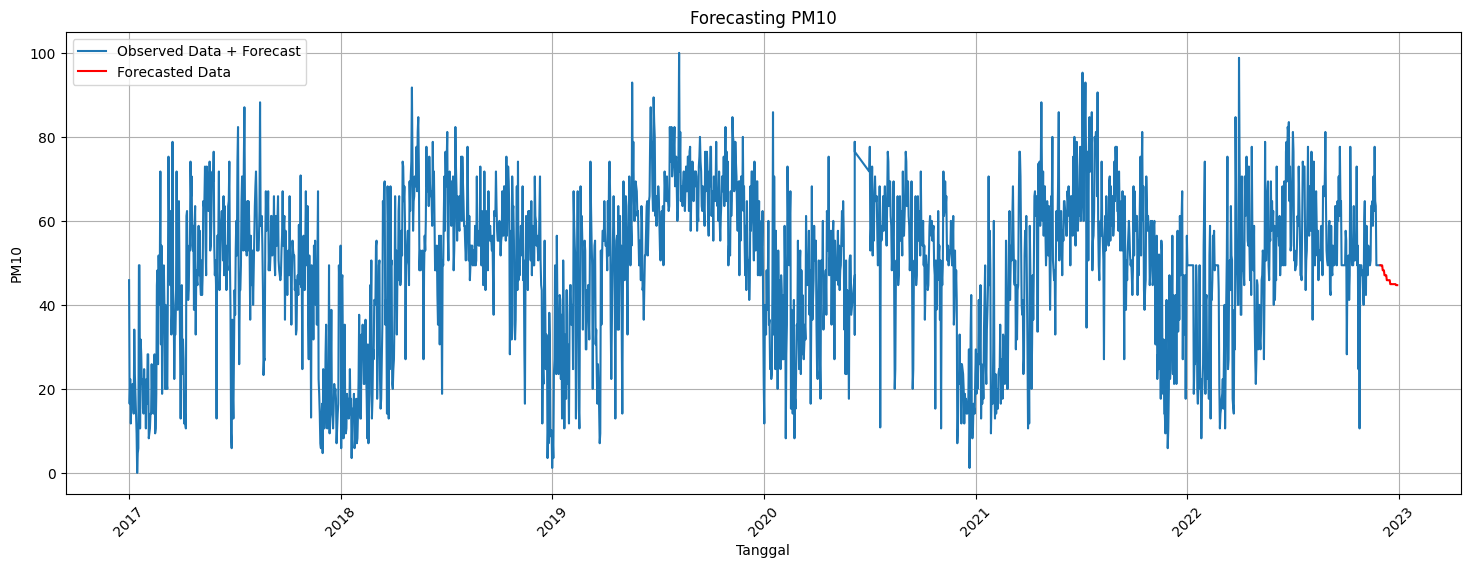

In [143]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## RBF Kernel

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['PM10'].min()
max_par = DKI2['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.132
MSE: 0.017
MAE: 0.104
R-Squared: -1.312
       Tanggal       PM10
0   2022-11-30  47.058824
1   2022-12-01  45.882353
2   2022-12-02  47.058824
3   2022-12-03  48.235294
4   2022-12-04  48.235294
5   2022-12-05  48.235294
6   2022-12-06  48.235294
7   2022-12-07  45.882353
8   2022-12-08  44.941176
9   2022-12-09  44.941176
10  2022-12-10  44.705882
11  2022-12-11  44.705882
12  2022-12-12  44.705882
13  2022-12-13  44.705882
14  2022-12-14  44.705882
15  2022-12-15  44.705882
16  2022-12-16  44.705882
17  2022-12-17  44.705882
18  2022-12-18  44.705882
19  2022-12-19  44.705882
20  2022-12-20  44.705882
21  2022-12-21  44.705882
22  2022-12-22  44.705882
23  2022-12-23  44.705882
24  2022-12-24  44.705882
25  2022-12-25  44.705882
26  2022-12-26  44.705882
27  2022-12-27  44.705882
28  2022-12-28  44.705882
29  2022-12-29  44.705882


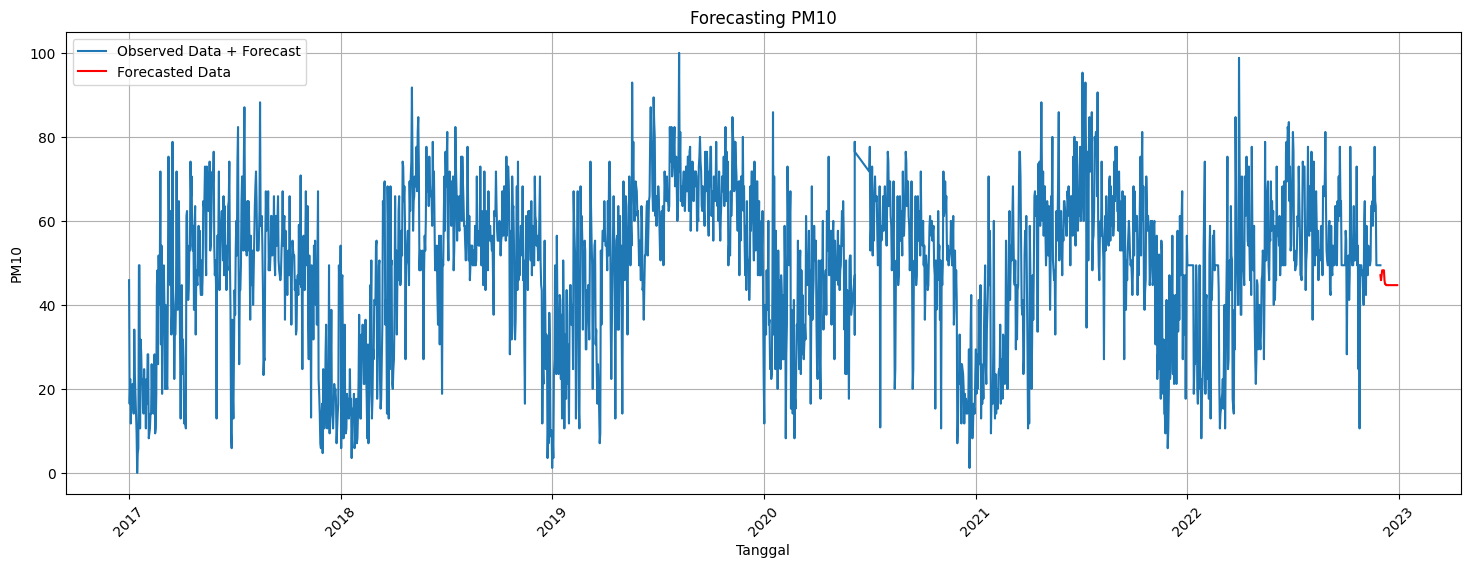

In [145]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Linear

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['PM10'].min()
max_par = DKI2['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.129
MSE: 0.017
MAE: 0.109
R-Squared: -1.208
       Tanggal       PM10
0   2022-11-30  64.470588
1   2022-12-01  64.470588
2   2022-12-02  64.470588
3   2022-12-03  64.470588
4   2022-12-04  64.470588
5   2022-12-05  64.470588
6   2022-12-06  64.470588
7   2022-12-07  64.470588
8   2022-12-08  64.470588
9   2022-12-09  64.470588
10  2022-12-10  64.470588
11  2022-12-11  64.470588
12  2022-12-12  64.470588
13  2022-12-13  64.470588
14  2022-12-14  64.470588
15  2022-12-15  64.470588
16  2022-12-16  64.470588
17  2022-12-17  64.470588
18  2022-12-18  64.470588
19  2022-12-19  64.470588
20  2022-12-20  64.470588
21  2022-12-21  64.470588
22  2022-12-22  64.470588
23  2022-12-23  64.470588
24  2022-12-24  64.470588
25  2022-12-25  64.470588
26  2022-12-26  64.470588
27  2022-12-27  64.470588
28  2022-12-28  64.470588
29  2022-12-29  64.470588


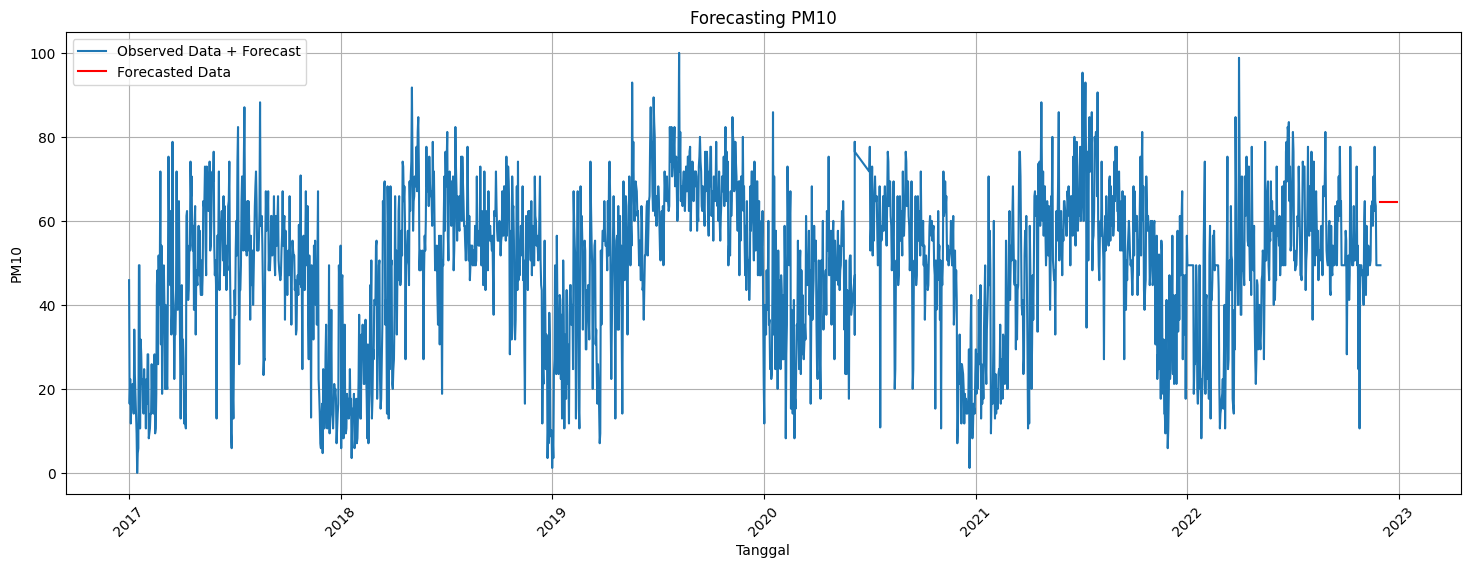

In [147]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Sigmoid

In [148]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['PM10'].min()
max_par = DKI2['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.089
MSE: 0.008
MAE: 0.072
R-Squared: -0.054
       Tanggal       PM10
0   2022-11-30  52.941176
1   2022-12-01  52.941176
2   2022-12-02  52.941176
3   2022-12-03  52.941176
4   2022-12-04  52.941176
5   2022-12-05  52.941176
6   2022-12-06  52.941176
7   2022-12-07  52.941176
8   2022-12-08  52.941176
9   2022-12-09  52.941176
10  2022-12-10  52.941176
11  2022-12-11  52.941176
12  2022-12-12  52.941176
13  2022-12-13  52.941176
14  2022-12-14  52.941176
15  2022-12-15  52.941176
16  2022-12-16  52.941176
17  2022-12-17  52.941176
18  2022-12-18  52.941176
19  2022-12-19  52.941176
20  2022-12-20  52.941176
21  2022-12-21  52.941176
22  2022-12-22  52.941176
23  2022-12-23  52.941176
24  2022-12-24  52.941176
25  2022-12-25  52.941176
26  2022-12-26  52.941176
27  2022-12-27  52.941176
28  2022-12-28  52.941176
29  2022-12-29  52.941176


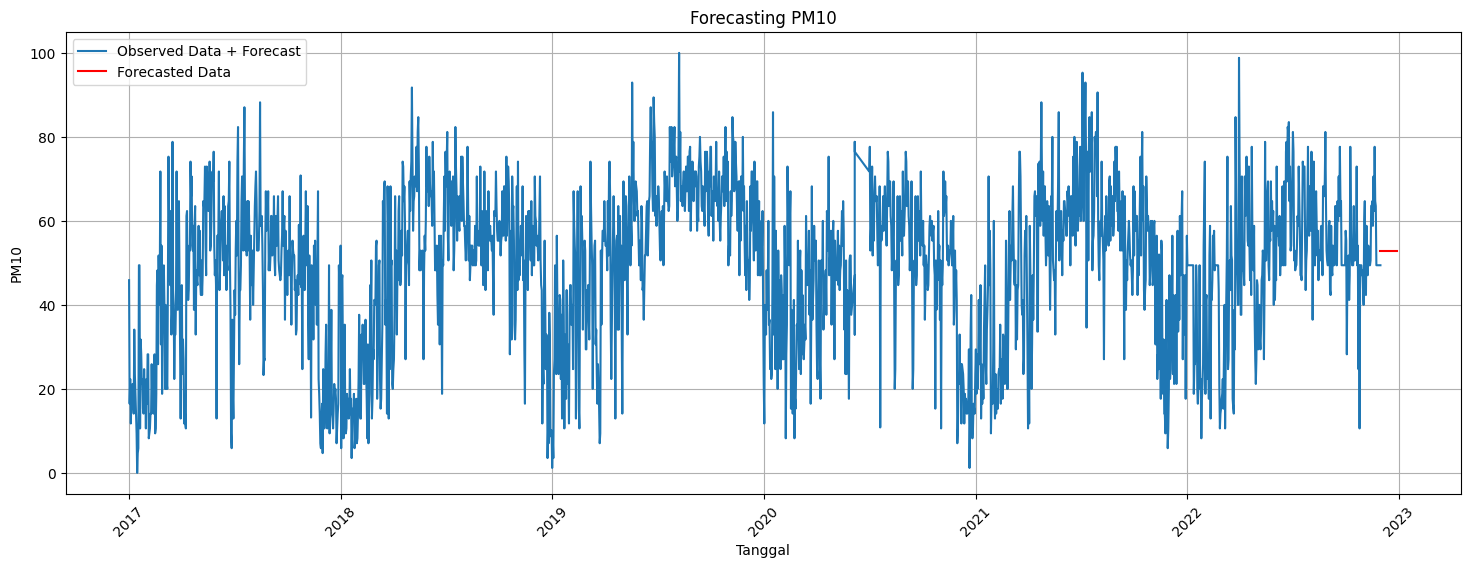

In [149]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Cosine

In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI2['PM10'].min()
max_par = DKI2['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI2['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.091
MSE: 0.008
MAE: 0.071
R-Squared: -0.116
       Tanggal  PM10
0   2022-11-30  52.0
1   2022-12-01  52.0
2   2022-12-02  52.0
3   2022-12-03  52.0
4   2022-12-04  52.0
5   2022-12-05  52.0
6   2022-12-06  52.0
7   2022-12-07  52.0
8   2022-12-08  52.0
9   2022-12-09  52.0
10  2022-12-10  52.0
11  2022-12-11  52.0
12  2022-12-12  52.0
13  2022-12-13  52.0
14  2022-12-14  52.0
15  2022-12-15  52.0
16  2022-12-16  52.0
17  2022-12-17  52.0
18  2022-12-18  52.0
19  2022-12-19  52.0
20  2022-12-20  52.0
21  2022-12-21  52.0
22  2022-12-22  52.0
23  2022-12-23  52.0
24  2022-12-24  52.0
25  2022-12-25  52.0
26  2022-12-26  52.0
27  2022-12-27  52.0
28  2022-12-28  52.0
29  2022-12-29  52.0


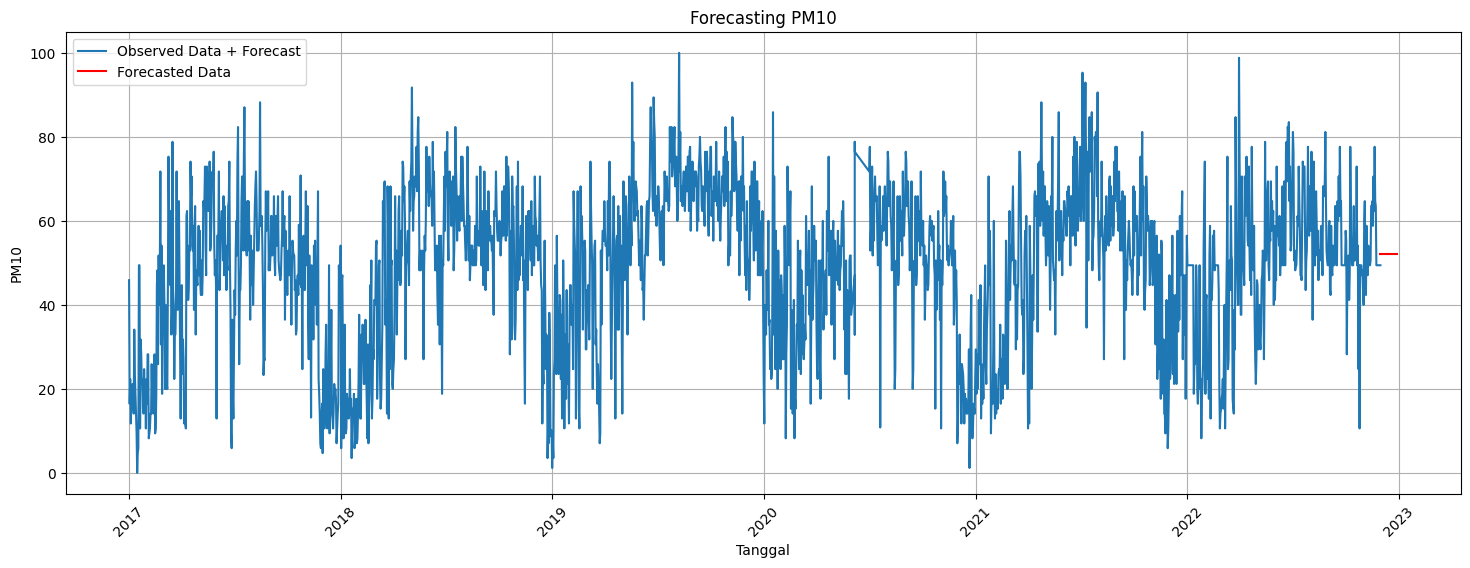

In [151]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI2['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI2[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI2['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
